In [1]:
pip install pyglet==1.5

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from robotic_warehouse.warehouse import Warehouse, RewardType, Action

In [3]:
"""
(x,y)=(shelf_columns,shelf_columns)
tiny: (1, 3)
small: (2, 3)
medium: (2, 5)
large: (3, 5)
"""
shelf_rows=1
shelf_columns=3

"""
n_agents = # of robots
"""
n_agents=1

"""
difficulty:
    easy = 2
    medium = 1
    hard = 0.5
"""
request_queue_size=int(n_agents*2)

"""
RewardType(Enum):
    GLOBAL = 0
    INDIVIDUAL = 1
    TWO_STAGE = 2
"""
reward_type= RewardType.GLOBAL

msg_bits=3
max_inactivity_steps=None
max_steps=500
sensor_range=1
column_height=8

Completed processing warehouse episode: 0
Completed processing warehouse episode: 1
Completed processing warehouse episode: 2
Completed processing warehouse episode: 3
Completed processing warehouse episode: 4
Completed processing warehouse episode: 5
Completed processing warehouse episode: 6
Completed processing warehouse episode: 7
Completed processing warehouse episode: 8
Completed processing warehouse episode: 9
Completed processing warehouse episode: 10
Completed processing warehouse episode: 11
Completed processing warehouse episode: 12
Completed processing warehouse episode: 13
Completed processing warehouse episode: 14
Completed processing warehouse episode: 15
Completed processing warehouse episode: 16
Completed processing warehouse episode: 17
Completed processing warehouse episode: 18
Completed processing warehouse episode: 19
Completed processing warehouse episode: 20
Completed processing warehouse episode: 21
Completed processing warehouse episode: 22
Completed processing 

C:\Users\naren\AppData\Roaming\Python\Python312\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Completed processing taxi episode: 11
Completed processing taxi episode: 12
Completed processing taxi episode: 13
Completed processing taxi episode: 14
Completed processing taxi episode: 15
Completed processing taxi episode: 16
Completed processing taxi episode: 17
Completed processing taxi episode: 18
Completed processing taxi episode: 19
Completed processing taxi episode: 20
Completed processing taxi episode: 21
Completed processing taxi episode: 22
Completed processing taxi episode: 23
Completed processing taxi episode: 24
Completed processing taxi episode: 25
Completed processing taxi episode: 26
Completed processing taxi episode: 27
Completed processing taxi episode: 28
Completed processing taxi episode: 29
Completed processing taxi episode: 30
Completed processing taxi episode: 31
Completed processing taxi episode: 32
Completed processing taxi episode: 33
Completed processing taxi episode: 34
Completed processing taxi episode: 35
Completed processing taxi episode: 36
Completed pr

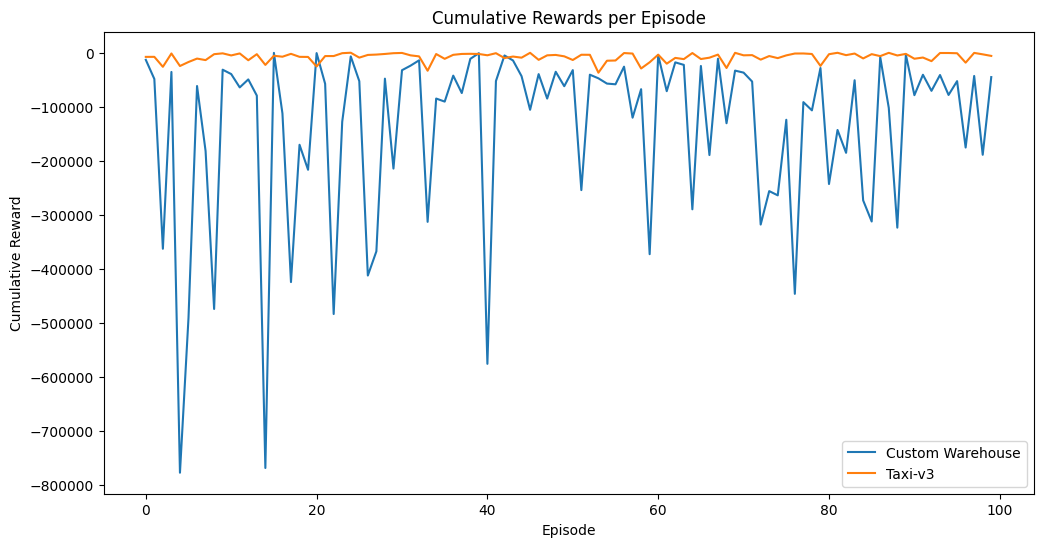

In [4]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Initialize environments
env1 = Warehouse(shelf_columns, column_height, shelf_rows, n_agents, msg_bits, sensor_range, request_queue_size, max_inactivity_steps, max_steps, reward_type)
env2 = gym.make("Taxi-v3")

# Sample agent action function
def sample_agent_action(env):
    return env.action_space.sample()

# Function to run an taxi environment for a fixed number of episodes
def run_taxi_environment(env, episodes):
    rewards = []
    for _ in range(episodes):
        print("Completed processing taxi episode: "+str(_))
        total_reward = 0
        done = False
        observation = env.reset()
        while not done:
            action = sample_agent_action(env)
            observation, reward, done, info, data = env.step(action)
            total_reward += reward
        rewards.append(total_reward)
    return rewards

    # Function to run an taxi environment for a fixed number of episodes
def run_warehouse_environment(env, episodes):
    rewards = []
    for _ in range(episodes):
        print("Completed processing warehouse episode: "+str(_))
        total_reward = 0
        delivered = False
        observation = env.reset()
        while not delivered:
            action = sample_agent_action(env)
            vals = list(env.step(action))
            total_reward += vals[1][0]
            #delivered=vals[2][0]
            delivered=vals[4]
        rewards.append(total_reward)
    return rewards

# Run experiments
episodes = 100
rewards_env1 = run_warehouse_environment(env1, episodes)
rewards_env2 = run_taxi_environment(env2, episodes)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(rewards_env1, label='Custom Warehouse')
plt.plot(rewards_env2, label='Taxi-v3')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards per Episode')
plt.legend()
plt.show()